# Diferencias entre hombres y mujeres en las estrategias cognitivas durante la contingencia sanitaria

.

### Si se ha demostrado que las mujeres se enfocan más en analizar los argumentos en comparación a los varones que tienen un análisis más herístico (Rajdev, 2016), entonces: ¿Habrá diferencias entre los hombres y mujeres en un test que mide la necesidad de cognición (NDC)?

In [126]:
#Librerías que utilicé 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 
import scipy.stats as stats
import seaborn as sns
from scipy.stats import t
import random

In [106]:
#Leo el dataset donde se encuentra guardada la información recopilada
data = pd.read_csv('data.csv',index_col=False)
#Compruebo que mi data se haya cargado de manera correcta
data.head(3)

,participant,age:1,gender:1,noticias:1,antecedente_psiq:1,ndc:1,ndc:2,ndc:3,ndc:4,ndc:5,...,beck:21,previo:1,previo:2,previo:3,previo:4,proximo:1,country,TIME_start,TIME_end,TIME_total
0,s.442dabe3-038d-4177-8093-cad29ab46349.txt,23,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,"MX, Mexico",2020-03-27-21-59,2020-03-27-22-02,3.0
1,s.5eff0105-b85b-43c4-a8e2-ec88898f274a.txt,49,2.0,1.0,2.0,3.0,5.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,"MX, Mexico",2020-04-03-17-37,2020-04-03-18-01,24.0
2,s.2f4f0f16-10f9-4087-91e1-996f25d726ad.txt,18,2.0,1.0,2.0,4.0,4.0,1.0,4.0,2.0,...,1.0,0.0,0.0,0.0,1.0,1.0,"MX, Mexico",2020-04-01-01-12,2020-04-01-01-22,10.0


Debido a que lo primero que quiero analizar es la relación género-puntaje en el TNC, eliminaré todas aquellas entradas de información que, de momento, no me serán de utilidad. 

In [107]:
#Primero renombro mis columnas para que me sea más fácil utilizarlas:
columnas = {'gender:1':'genero','ndc:1':'uno','ndc:2':'dos','ndc:3':'tres','ndc:4':'cuatro','ndc:5':'cinco','ndc:6':'seis','ndc:7':'siete',
           'ndc:8':'ocho','ndc:9':'nueve','ndc:10':'diez','ndc:11':'once','ndc:12':'doce','ndc:13':'trece',
           'ndc:14':'catorce','ndc:15':'quince','ndc:16':'dieciseis','ndc:17':'diecisiete','ndc:18':'dieciocho'}
#Renombro las columnas
data = data.rename(columns=columnas)
#Hago una distinción y discrimino todas las columnas que no utilizaré:
data = data[['genero','uno','dos','tres','cuatro','cinco','seis','siete','ocho','nueve','diez','once','doce','trece',
            'catorce','quince','dieciseis','diecisiete','dieciocho']]
#Compruebo que mi información se haya guardado de manera correcta
data.head()

,genero,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve,diez,once,doce,trece,catorce,quince,dieciseis,diecisiete,dieciocho
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,3.0,5.0,1.0,1.0,1.0,5.0,1.0,3.0,4.0,4.0,5.0,1.0,5.0,5.0,5.0,1.0,1.0,5.0
2,2.0,4.0,4.0,1.0,4.0,2.0,2.0,1.0,3.0,2.0,4.0,4.0,1.0,3.0,3.0,4.0,2.0,2.0,3.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ahora solamente estoy trabajando con la información del género y las respuestas dadas en el TNC, eliminaré la información de aquellas personas que no terminaron de responder

In [108]:
#Elimino todas las filas que tengan mínimo una entrada vacía 
data = data.dropna()
#Verifico mi base de datos
data.head()

,genero,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve,diez,once,doce,trece,catorce,quince,dieciseis,diecisiete,dieciocho
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,3.0,5.0,1.0,1.0,1.0,5.0,1.0,3.0,4.0,4.0,5.0,1.0,5.0,5.0,5.0,1.0,1.0,5.0
2,2.0,4.0,4.0,1.0,4.0,2.0,2.0,1.0,3.0,2.0,4.0,4.0,1.0,3.0,3.0,4.0,2.0,2.0,3.0
5,1.0,4.0,4.0,1.0,1.0,2.0,3.0,2.0,1.0,2.0,4.0,5.0,1.0,4.0,5.0,5.0,1.0,1.0,4.0
6,2.0,3.0,5.0,1.0,3.0,3.0,3.0,1.0,3.0,5.0,1.0,5.0,3.0,5.0,3.0,5.0,1.0,1.0,1.0


In [109]:
#Como todos mis elementos son booleanos o enteros, cambio el formato de todas las columnas para que sean valores enteros
data = data.astype(int)
#Verifico que mi información se haya guardado correctamente
data.head()

,genero,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve,diez,once,doce,trece,catorce,quince,dieciseis,diecisiete,dieciocho
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,3,5,1,1,1,5,1,3,4,4,5,1,5,5,5,1,1,5
2,2,4,4,1,4,2,2,1,3,2,4,4,1,3,3,4,2,2,3
5,1,4,4,1,1,2,3,2,1,2,4,5,1,4,5,5,1,1,4
6,2,3,5,1,3,3,3,1,3,5,1,5,3,5,3,5,1,1,1


In [111]:
#Aquí calculo el promedio de respuesta del TNC por alumno 
data['promedio tnc'] = (data['uno'] + data['dos'] + data['tres']+data['cuatro']+
                                 data['cinco']+data['seis']+data['siete']+data['ocho']
                                 +data['nueve']+data['diez']+data['once']+data['doce']
                                 +data['trece']+data['catorce']+data['quince']+data['dieciseis']+data['diecisiete']+data['dieciocho'])/18
#Verifico que mi información se haya cargado correctamente
data.head()

,genero,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve,diez,once,doce,trece,catorce,quince,dieciseis,diecisiete,dieciocho,promedio tnc
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.000000
1,2,3,5,1,1,1,5,1,3,4,4,5,1,5,5,5,1,1,5,3.111111
2,2,4,4,1,4,2,2,1,3,2,4,4,1,3,3,4,2,2,3,2.722222
5,1,4,4,1,1,2,3,2,1,2,4,5,1,4,5,5,1,1,4,2.777778
6,2,3,5,1,3,3,3,1,3,5,1,5,3,5,3,5,1,1,1,2.888889


###### Disclaimer:
Según la encuesta, el número 1 en el género significa Hombre y el 2 mujer <==== Por favor, verificar

In [120]:
#Cambio la nomenclatura en la columna del género para que sea más fácil de entender
for index,row in data.iterrows():
    if data['genero'][index] == 1:
        data['genero'][index] = 'hombre'
    elif data['genero'][index] == 2:
        data['genero'][index] = 'mujer'
#Verifico que mi información se haya cargado correctamente
data.head(5)

,genero,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve,diez,once,doce,trece,catorce,quince,dieciseis,diecisiete,dieciocho,promedio tnc
0,hombre,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.000000
1,mujer,3,5,1,1,1,5,1,3,4,4,5,1,5,5,5,1,1,5,3.111111
2,mujer,4,4,1,4,2,2,1,3,2,4,4,1,3,3,4,2,2,3,2.722222
5,hombre,4,4,1,1,2,3,2,1,2,4,5,1,4,5,5,1,1,4,2.777778
6,mujer,3,5,1,3,3,3,1,3,5,1,5,3,5,3,5,1,1,1,2.888889


In [121]:
#Aquí hago una división de mis datos para poder ahora sí analizar a las dos muestras por separado
# Es decir, la de hombres y la de mujeres
hombres = data[data['genero']=='hombre']
mujeres = data[data['genero']=='mujer']

##### Disclaimer:
Debido a que la cantidad de mujeres que respondió con respecto a los hombres es 3 veces mayor (18-6), elegí a 6 mujeres al azar para poder comparar entonces dos grupos de poblaciones iguales.

In [159]:
#Paso todos los promedios resultantes a listas
l_hombres = hombres['promedio tnc'].tolist()
l_mujeres = mujeres['promedio tnc'].tolist()
#Acorto mis resultados a nada más 6 elementos
for i in range(0,12):
    eliminar = random.randint(1,len(l_mujeres)-1)
    l_mujeres.pop(eliminar)

In [168]:
#Creo una función que me plotee los grupos que quiero comparar
def ploteo(listax,listay,numerodegrupo,numerodegrupo1):
    plt.figure(figsize=(16,5))
    plt.title('Distribuciones de los grupos '+str(numerodegrupo)+' y '+str(numerodegrupo1),fontsize=20)
    sns.distplot(listax,label='group '+str(numerodegrupo))
    sns.distplot(listay,label='group '+str(numerodegrupo1))
    plt.axvline(np.mean(listax),color='blue',label='promedio grupo'+str(numerodegrupo))
    plt.axvline(np.mean(listay),color='orange',label='promedio grupo'+str(numerodegrupo1))
    plt.legend()
#Creo una función que me muestre la información necesaria para el cálculo del t-value 
def test(x,y,numerodegrupo,numerodegrupo1):
    tabla = pd.DataFrame(columns=['Grupo','promedio','STD','varianza','Tamaño muestra'])
    valores = {'Grupo':numerodegrupo,'promedio':x['promedio tnc'].mean(),
              'STD':x['promedio tnc'].std(),
              'varianza':x['promedio tnc'].var(),'Tamaño muestra':len(l_hombres)}
    tabla= tabla.append(valores,ignore_index=True)
    valores = {'Grupo':numerodegrupo1,'promedio':y['promedio tnc'].mean(),
              'STD':y['promedio tnc'].std(),
              'varianza':y['promedio tnc'].var(), 'Tamaño muestra':len(l_mujeres)}
    tabla = tabla.append(valores,ignore_index=True)
    display(tabla)

#Creo una función de orden superior que hace las comprobaciones en automático, inclutyendo entonces el t y p value
def comprobar(lista1,lista2,grupo1,grupo2,numero1,numero2):
    ploteo(lista1,lista2,numero1,numero2)
    test(grupo1,grupo2,numero1,numero2)
    print(stats.ttest_ind(lista1,lista2,equal_var=False))

,Grupo,promedio,STD,varianza,Tamaño muestra
0,Hombres,2.305556,1.050426,1.103395,6
1,Mujeres,2.978395,0.278847,0.077756,6


Ttest_indResult(statistic=-1.373314356625639, pvalue=0.2235315629462177)


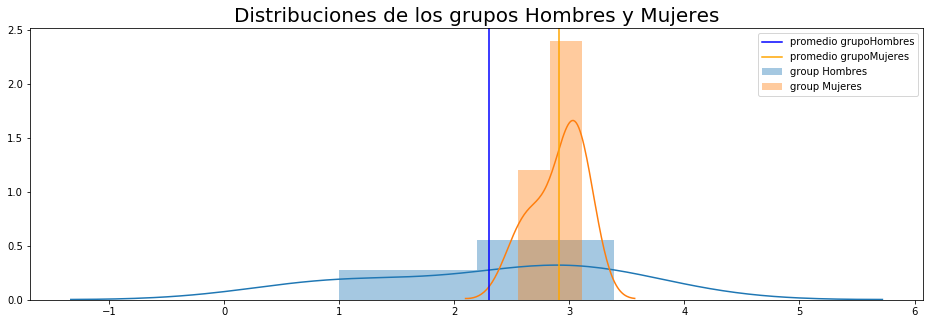

In [169]:
comprobar(l_hombres,l_mujeres,hombres,mujeres,'Hombres','Mujeres')

## Conclusión:
Una vez analizando ambos grupos y haciendo una prueba t-student, podemos concluir que no existe evidencia suficiente como para rechazar la hipóstesis nula; es decir, NO podemos decir que existe evidencia estadística que indique un comportamiento diferente entre hombres y mujeres